In [29]:
%load_ext autoreload
%autoreload 2

In [30]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob

from RaTag.core.fitting import fit_gaussian_to_histogram, plot_gaussian_fit
from RaTag.workflows.energy_mapping import plot_energy_spectra_in_run, create_energy_maps_in_run
from RaTag.scripts.run_analysis import load_config, create_run_from_config
from RaTag.workflows.recoil_integration import fit_set_s2
from RaTag.workflows.run_construction import initialize_run
from RaTag.core.dataIO import load_s2area
from RaTag.core.fitting import fit_s2_area_auto
from RaTag.plotting import plot_s2_fit_result

%matplotlib inline

In [31]:
path_config = Path('/Users/pabloherrero/sabat/RaTagging/configs/run10_analysis.yaml')
config = load_config(path_config)
run = create_run_from_config(config)
run

Run(root_directory=PosixPath('/Volumes/KINGSTON/RaTag_data/RUN10_Ra226'), run_id='RUN10', el_field=2350.0, target_isotope='Ra226', pressure=2.0, temperature=297.0, sampling_rate='5.0e9', el_gap=0.8, drift_gap=1.4, sets=[], gas_density=None, width_s2=1.1, t_s1=0.0, W_value=22.0, E_gamma_xray=12300.0, A_x_mean=None, N_e_exp=None, g_S2=None, alpha_calibration=None, isotope_ranges=None)

In [32]:
run = initialize_run(run, max_files=None)


RUN INITIALIZATION

[1/3] Gas density...
  ✓ Gas density: 4.877e+19 cm⁻³

[2/3] Populating sets...
Detected single-isotope files...
  Loaded: FieldScan_Gate0050_Anode1950 - 1800 files (86400 waveforms) [FastFrame (48 frames/file)]
Detected single-isotope files...
  Loaded: FieldScan_Gate0100_Anode2000 - 1500 files (72000 waveforms) [FastFrame (48 frames/file)]
Detected single-isotope files...
  Loaded: FieldScan_Gate0200_Anode2100 - 1998 files (95904 waveforms) [FastFrame (48 frames/file)]
Detected single-isotope files...
  Loaded: FieldScan_Gate0400_Anode2300 - 2000 files (96000 waveforms) [FastFrame (48 frames/file)]
Detected single-isotope files...
  Loaded: FieldScan_Gate0600_Anode2500 - 2000 files (96000 waveforms) [FastFrame (48 frames/file)]
Detected single-isotope files...
  Loaded: FieldScan_Gate0800_Anode2700 - 2000 files (96000 waveforms) [FastFrame (48 frames/file)]
Detected single-isotope files...
  Loaded: FieldScan_Gate1000_Anode2900 - 2000 files (96000 waveforms) [Fast

In [33]:
[s.source_dir.name for s in run.sets]

['FieldScan_Gate0050_Anode1950',
 'FieldScan_Gate0100_Anode2000',
 'FieldScan_Gate0200_Anode2100',
 'FieldScan_Gate0400_Anode2300',
 'FieldScan_Gate0600_Anode2500',
 'FieldScan_Gate0800_Anode2700',
 'FieldScan_Gate1000_Anode2900',
 'FieldScan_Gate1200_Anode3100',
 'FieldScan_Gate1500_Anode3400',
 'FieldScan_Gate1800_Anode3700',
 'FieldScan_Gate2000_Anode3900']

## Inspect histograms

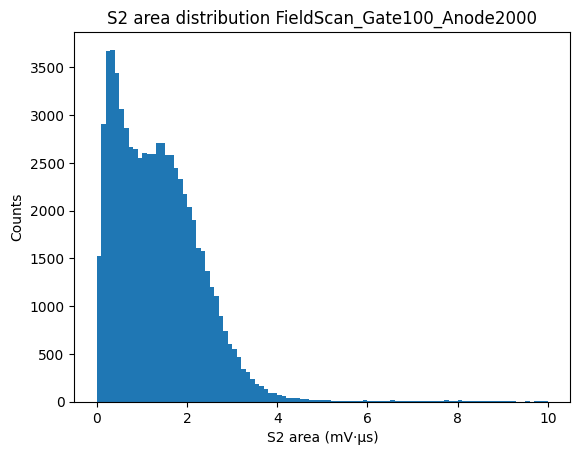

In [139]:
s2a = load_s2area(run.sets[2])
plt.hist(s2a.areas, range = (0, 10), bins=100);
plt.gca().set(title=f'S2 area distribution {run.sets[2].source_dir.name}', xlabel='S2 area (mV·µs)', ylabel='Counts');

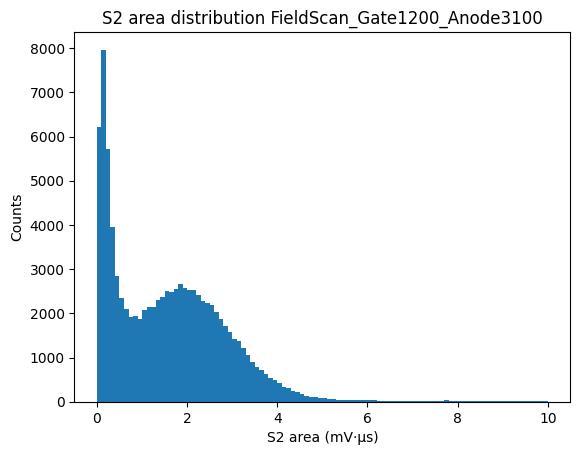

In [140]:
s3a = load_s2area(run.sets[3])
plt.hist(s3a.areas, range = (0, 10), bins=100);
plt.gca().set(title=f'S2 area distribution {run.sets[3].source_dir.name}', xlabel='S2 area (mV·µs)', ylabel='Counts');

In [169]:
setidx = 5
s2a = load_s2area(run.sets[setidx])

s2a_fitted = fit_s2_area_auto(s2a.areas, bin_cuts=(0,10), nbins=200, bg_threshold=0.4, bg_cutoff=0.5)
# plot_s2_fit_result(s2a_fitted, s2a.areas)

  Background detection: 18.1% of counts in low region
  Recommendation: two_stage
  Using two-stage fitting with background subtraction...


In [146]:
[s.source_dir.name for s in run.sets]

['FieldScan_Gate050_Anode1950',
 'FieldScan_Gate1000_Anode2900',
 'FieldScan_Gate100_Anode2000',
 'FieldScan_Gate1200_Anode3100',
 'FieldScan_Gate1500_Anode3400',
 'FieldScan_Gate1800_Anode3700',
 'FieldScan_Gate2000_Anode3900',
 'FieldScan_Gate200_Anode2100',
 'FieldScan_Gate400_Anode2300',
 'FieldScan_Gate600_Anode2500',
 'FieldScan_Gate800_Anode2700']

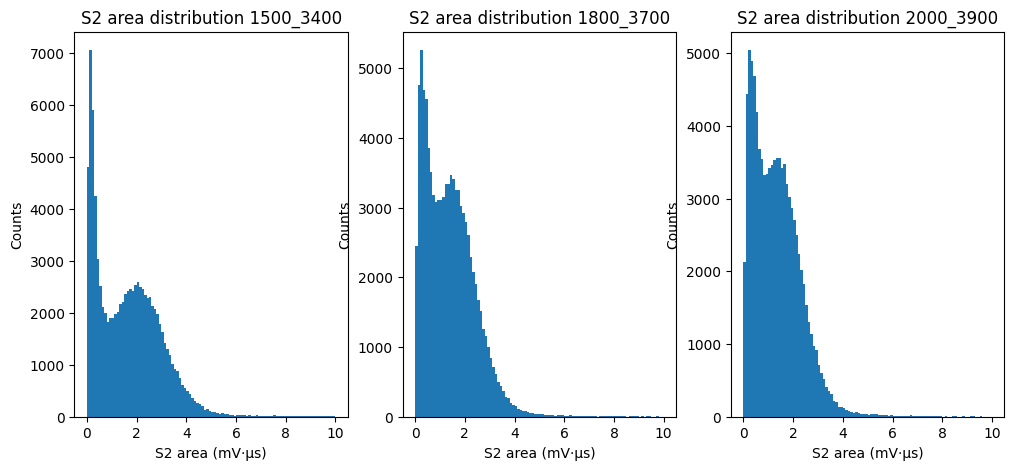

In [163]:
s0a = load_s2area(run.sets[4])
s7a = load_s2area(run.sets[5])
s8a = load_s2area(run.sets[6])

name_x = lambda x: str(x.source_dir.name).replace('FieldScan_Gate', '').replace('Anode', '')
fig, ax = plt.subplots(1,3, figsize=(12,5))
ax[0].hist(s0a.areas, range = (0, 10), bins=100);
ax[0].set(title=f'S2 area distribution {name_x(run.sets[4])}', xlabel='S2 area (mV·µs)', ylabel='Counts');
ax[1].hist(s7a.areas, range = (0, 10), bins=100);
ax[1].set(title=f'S2 area distribution {name_x(run.sets[5])}', xlabel='S2 area (mV·µs)', ylabel='Counts');
ax[2].hist(s8a.areas, range = (0, 10), bins=100);
ax[2].set(title=f'S2 area distribution {name_x(run.sets[6])}', xlabel='S2 area (mV·µs)', ylabel='Counts');

## Inspect raw wfms

In [41]:
from RaTag.core.dataIO import iter_frames
from RaTag.plotting import plot_n_waveforms

In [162]:
set7 = run.sets[7]

# plot_n_waveforms(set7, n_waveforms=1)

In [119]:
from RaTag.core.wfm2read_fast import wfm2read
wf7 = wfm2read(str(set7.source_dir / set7.filenames[0]))
wf6 = wfm2read(str(set6.source_dir / set6.filenames[0]))

In [120]:
print(wf7[2])

{'byte_order_verification': '0F0F', 'versioning_number': ':WFM#003', 'num_digits_in_byte_count': 7, 'num_bytes_to_EOF': 2454991, 'num_bytes_per_point': 1, 'byte_offset_to_beginning_of_curve_buffer': 3430, 'horizontal_zoom_scale_factor': 2, 'horizontal_zoom_position': 50.0, 'vertical_zoom_scale_factor': 5.263544247e-315, 'vertical_zoom_position': 0.0, 'waveform_label': '', 'N': 48, 'size_of_waveform_header': 760, 'ed1': {'dim_scale': 0.0004000000283122063, 'dim_offset': -0.0398000031709671, 'dim_size': 0, 'units': 'V', 'dim_extent_min': 0.0, 'dim_extent_max': 0.0, 'dim_resolution': 0.0004000000283122063, 'dim_ref_point': 0.0, 'format': [7, 0, 0, 0], 'storage_type': [0, 0, 0, 0], 'n_value': 0, 'over_range': 0, 'under_range': 0, 'high_range': 0, 'low_range': 0, 'user_scale': 0.010000000707805157, 'user_units': 'V', 'user_offset': 3.9800000190734863, 'point_density': 1.0, 'href': 30.0, 'trig_delay': 0.0}, 'ed2': {'dim_scale': 0.0, 'dim_offset': 0.0, 'dim_size': 0, 'units': '', 'dim_extent_

In [156]:
for i in range(len(run.sets)):
    seti = run.sets[i]
    print(f'Set {i} - {seti.source_dir.name}')
    wfi = wfm2read(str(seti.source_dir / seti.filenames[0]))
    print(wfi[2])
    print(wfi[2]['id1']['dim_scale'])

Set 0 - FieldScan_Gate050_Anode1950
{'byte_order_verification': '0F0F', 'versioning_number': ':WFM#003', 'num_digits_in_byte_count': 8, 'num_bytes_to_EOF': 12254991, 'num_bytes_per_point': 1, 'byte_offset_to_beginning_of_curve_buffer': 3430, 'horizontal_zoom_scale_factor': 2, 'horizontal_zoom_position': 50.0, 'vertical_zoom_scale_factor': 5.263544247e-315, 'vertical_zoom_position': 0.0, 'waveform_label': '', 'N': 48, 'size_of_waveform_header': 760, 'ed1': {'dim_scale': 0.0004000000283122063, 'dim_offset': -0.0398000031709671, 'dim_size': 0, 'units': 'V', 'dim_extent_min': 0.0, 'dim_extent_max': 0.0, 'dim_resolution': 0.0004000000283122063, 'dim_ref_point': 0.0, 'format': [7, 0, 0, 0], 'storage_type': [0, 0, 0, 0], 'n_value': 0, 'over_range': 0, 'under_range': 0, 'high_range': 0, 'low_range': 0, 'user_scale': 0.010000000707805157, 'user_units': 'V', 'user_offset': 3.9800000190734863, 'point_density': 1.0, 'href': 30.0, 'trig_delay': 0.0}, 'ed2': {'dim_scale': 0.0, 'dim_offset': 0.0, 'di

In [124]:
print(wf7[2]['ed1'])
print(wf6[2]['ed1'])

{'dim_scale': 0.0004000000283122063, 'dim_offset': -0.0398000031709671, 'dim_size': 0, 'units': 'V', 'dim_extent_min': 0.0, 'dim_extent_max': 0.0, 'dim_resolution': 0.0004000000283122063, 'dim_ref_point': 0.0, 'format': [7, 0, 0, 0], 'storage_type': [0, 0, 0, 0], 'n_value': 0, 'over_range': 0, 'under_range': 0, 'high_range': 0, 'low_range': 0, 'user_scale': 0.010000000707805157, 'user_units': 'V', 'user_offset': 3.9800000190734863, 'point_density': 1.0, 'href': 30.0, 'trig_delay': 0.0}
{'dim_scale': 0.0004000000283122063, 'dim_offset': -0.0398000031709671, 'dim_size': 0, 'units': 'V', 'dim_extent_min': 0.0, 'dim_extent_max': 0.0, 'dim_resolution': 0.0004000000283122063, 'dim_ref_point': 0.0, 'format': [7, 0, 0, 0], 'storage_type': [0, 0, 0, 0], 'n_value': 0, 'over_range': 0, 'under_range': 0, 'high_range': 0, 'low_range': 0, 'user_scale': 0.010000000707805157, 'user_units': 'V', 'user_offset': 3.9800000190734863, 'point_density': 1.0, 'href': 30.0, 'trig_delay': 0.0}


# Test different integration ranges

In [34]:
from RaTag.workflows.recoil_integration import workflow_s2_integration
from RaTag.core.dataIO import load_set_metadata
set0 = run.sets[0]
set0 = load_set_metadata(set0)
set0.metadata

{'anode': 1950,
 'gate': 50,
 't_s1': -2.94,
 't_s1_std': 3.264,
 't_s2_start': 16.135,
 't_s2_start_std': 1.773,
 't_s2_end': 24.925,
 't_s2_end_std': 3.068,
 's2_duration': 8.383,
 's2_duration_std': 3.996,
 'n_areas_recoil': 20016,
 'area_s2_mean': 1.223,
 'area_s2_ci95': 0.025,
 'area_s2_sigma': 0.843,
 'area_s2_fit_success': True,
 'area_s2_fit_method': 'simple'}

In [35]:
t_s2_end = 35
fits = []
for s in run.sets:
    print(f'Set: {s.source_dir.name}')
    setm = load_set_metadata(s)
    setm.metadata['t_s2_end'] = 35
    seti = workflow_s2_integration(setm, max_frames=5000)
    s2a = load_s2area(s)
    fit_res = fit_s2_area_auto(s2a.areas, bin_cuts=(0,10), nbins=200, bg_threshold=0.4, bg_cutoff=0.5)
    plot_s2_fit_result(fit_res, s2a.areas)
    fits.append(fit_res)

Set: FieldScan_Gate0050_Anode1950
  Integrating S2 window: [16.14, 35.00] µs
  Processing 105 files (~5040 frames)


KeyboardInterrupt: 

In [35]:
s2a_fitted['result_sig'].params['sig_x0']
# 1.96 * s2a_fitted['peak_stderr']
# s2a_fitted

<Parameter 'sig_x0', value=np.float64(1.9698025124736882), bounds=[np.float64(0.12500000003342993):3.5]>

FieldScan_Gate0050_Anode1950
FieldScan_Gate0100_Anode2000
FieldScan_Gate0200_Anode2100
FieldScan_Gate0400_Anode2300
FieldScan_Gate0600_Anode2500
FieldScan_Gate0800_Anode2700
FieldScan_Gate1000_Anode2900
FieldScan_Gate1200_Anode3100
FieldScan_Gate1500_Anode3400
FieldScan_Gate1800_Anode3700
FieldScan_Gate2000_Anode3900


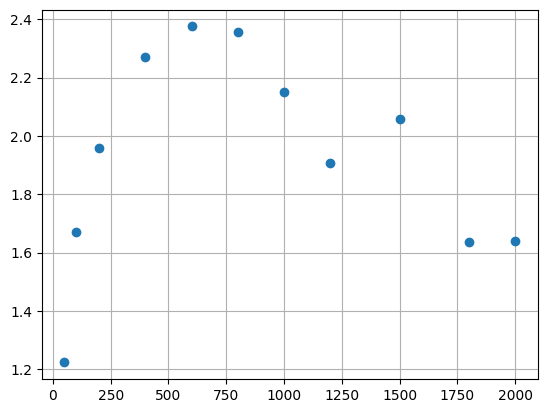

In [47]:

fields = []
mean_a = []
for s in run.sets:
    print(s.source_dir.name)
    sm = load_set_metadata(s)
    fields.append(sm.metadata['gate'])
    mean_a.append(sm.metadata['area_s2_mean'])
plt.plot(fields, mean_a, 'o')
plt.grid()
# plt.gca().set(xlim=(0, 1200))

# Inspect individual set

Detected single-isotope files...


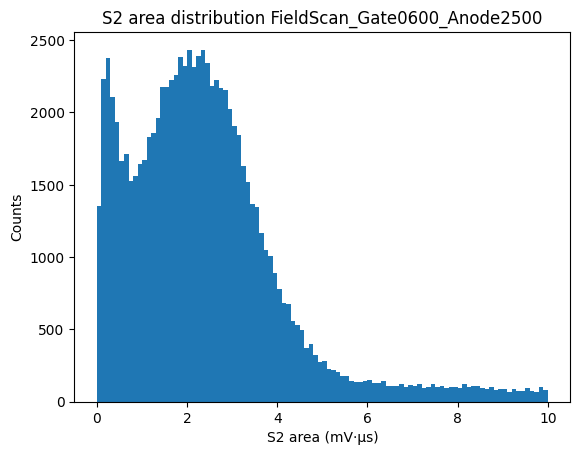

In [48]:
from RaTag.core.constructors import set_from_dir


set6 = set_from_dir(Path('/Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/FieldScan_Gate0600_Anode2500'))
s6a = load_s2area(set6)
plt.hist(s6a.areas, range = (0, 10), bins=100);
plt.gca().set(title=f'S2 area distribution {set6.source_dir.name}', xlabel='S2 area (mV·µs)', ylabel='Counts');

# Gate vs EL_field/drift_field graph for different ΔV values

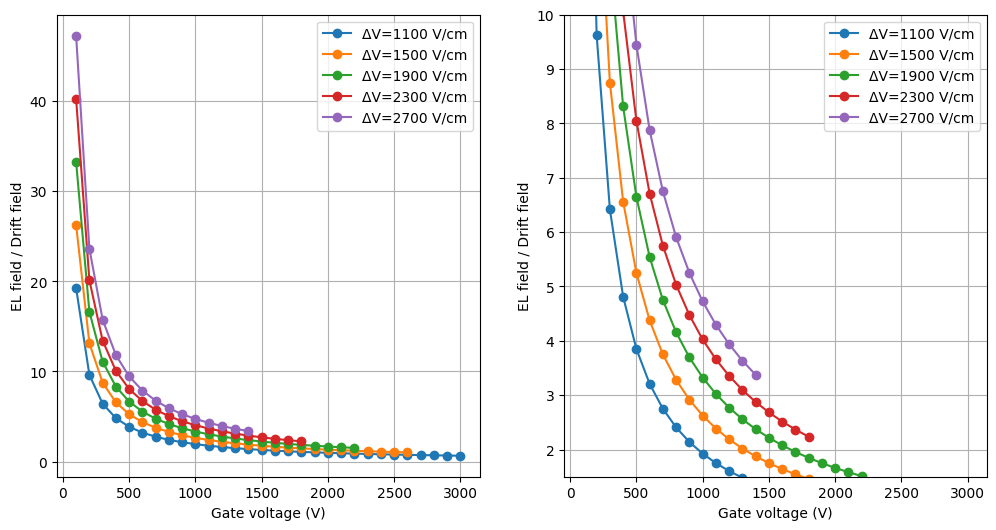

In [140]:
dvs = [1100, 1500, 1900, 2300, 2700]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
for dv in dvs:
    anodes = range(100 + dv, 4200, 100)
    gates = [a - dv for a in anodes]
    drift_gap = 1.4
    el_gap = 0.8
    fields = np.array([g / drift_gap for g in gates])
    el_fields = np.array([dv / el_gap for a in anodes])
    ax1.plot(gates, el_fields / fields, 'o-', label=f'ΔV={dv} V/cm')
    ax2.plot(gates, el_fields / fields, 'o-', label=f'ΔV={dv} V/cm')

for ax in [ax1, ax2]:
    ax.set(xlabel='Gate voltage (V)',  ylabel='EL field / Drift field')
    ax.grid()
    ax.legend()

ax2.set(ylim=(1.5, 10))

plt.gcf().savefig('/Users/pabloherrero/sabat/RaTagging/figures_paper/Field_amplif_vs_gate_voltage', dpi=300 )

# Study minimum number of statistics needed

In [92]:
set0 = run.sets[0]
fits = []
setm = load_set_metadata(set0)
setm.n_files * 49

88200

  Integrating S2 window: [16.14, 24.93] µs
    ✓ Integrated 86400 frames
    💾 Saved s2 areas to all/FieldScan_Gate0050_Anode1950_s2_areas.npz
  Background detection: 17.4% of counts in low region
  Recommendation: two_stage
  Using two-stage fitting with background subtraction...
  Integrating S2 window: [16.14, 24.93] µs
  Processing 834 files (~40032 frames)
    ✓ Integrated 40032 frames
    💾 Saved s2 areas to all/FieldScan_Gate0050_Anode1950_s2_areas.npz
  Background detection: 17.4% of counts in low region
  Recommendation: two_stage
  Using two-stage fitting with background subtraction...
  Integrating S2 window: [16.14, 24.93] µs
  Processing 209 files (~10032 frames)
    ✓ Integrated 10032 frames
    💾 Saved s2 areas to all/FieldScan_Gate0050_Anode1950_s2_areas.npz
  Background detection: 17.4% of counts in low region
  Recommendation: two_stage
  Using two-stage fitting with background subtraction...
  Integrating S2 window: [16.14, 24.93] µs
  Processing 105 files (~5040 fra

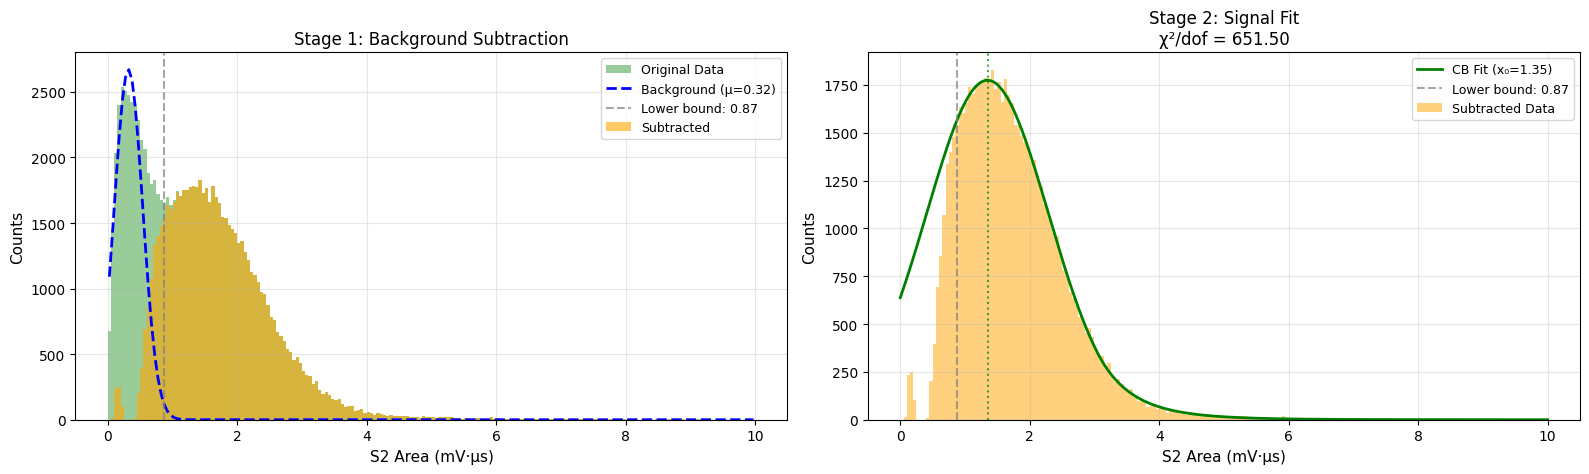

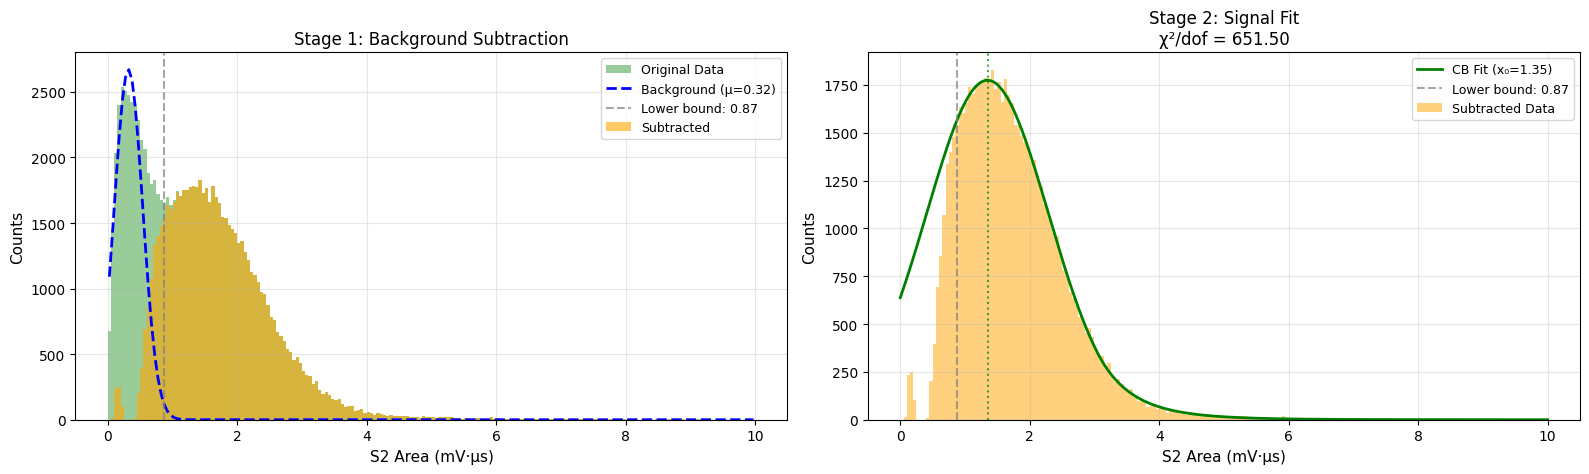

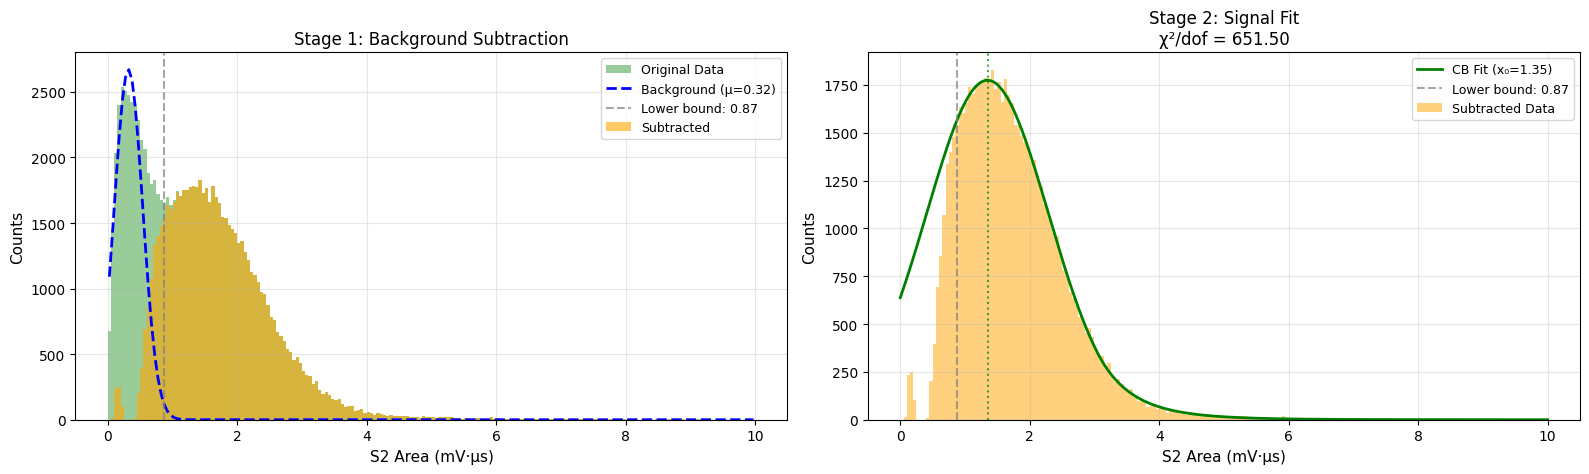

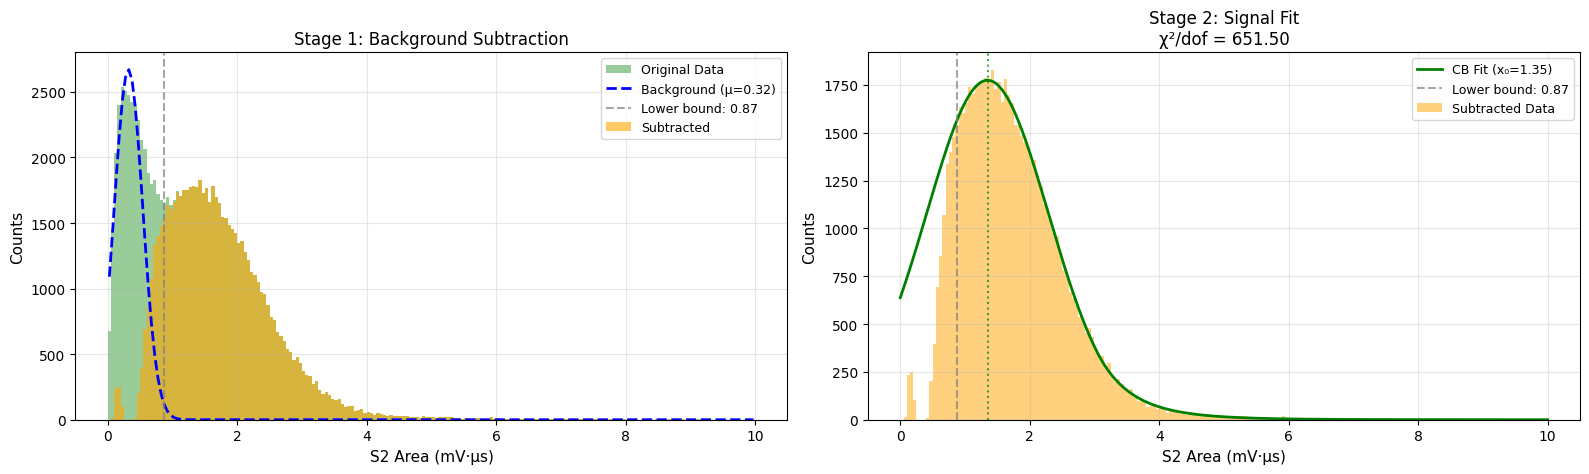

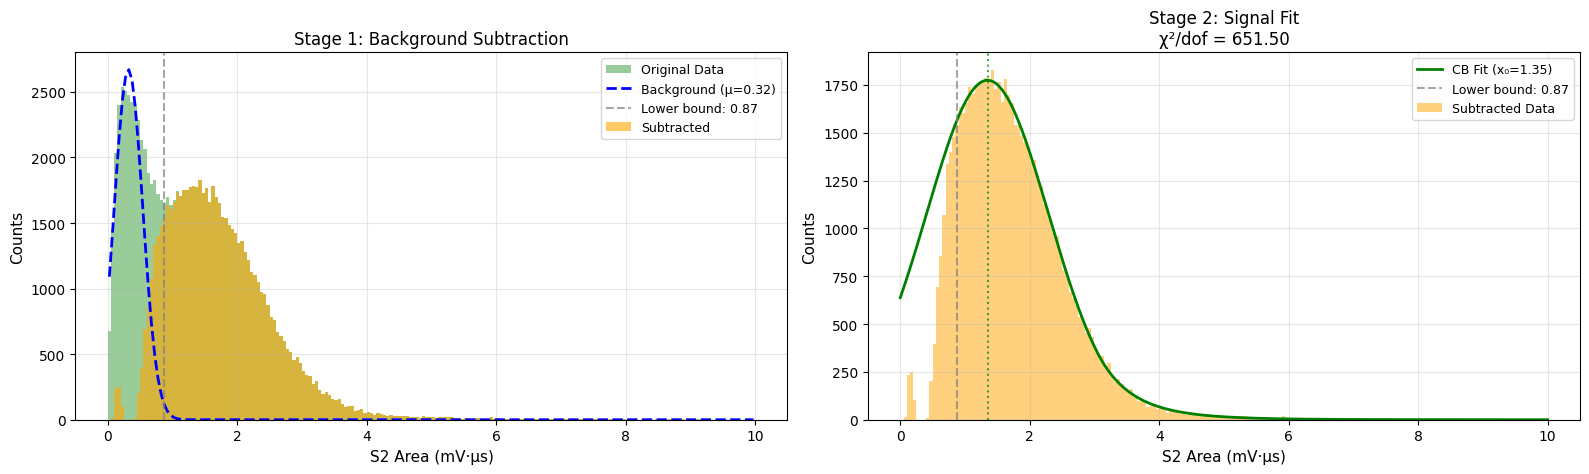

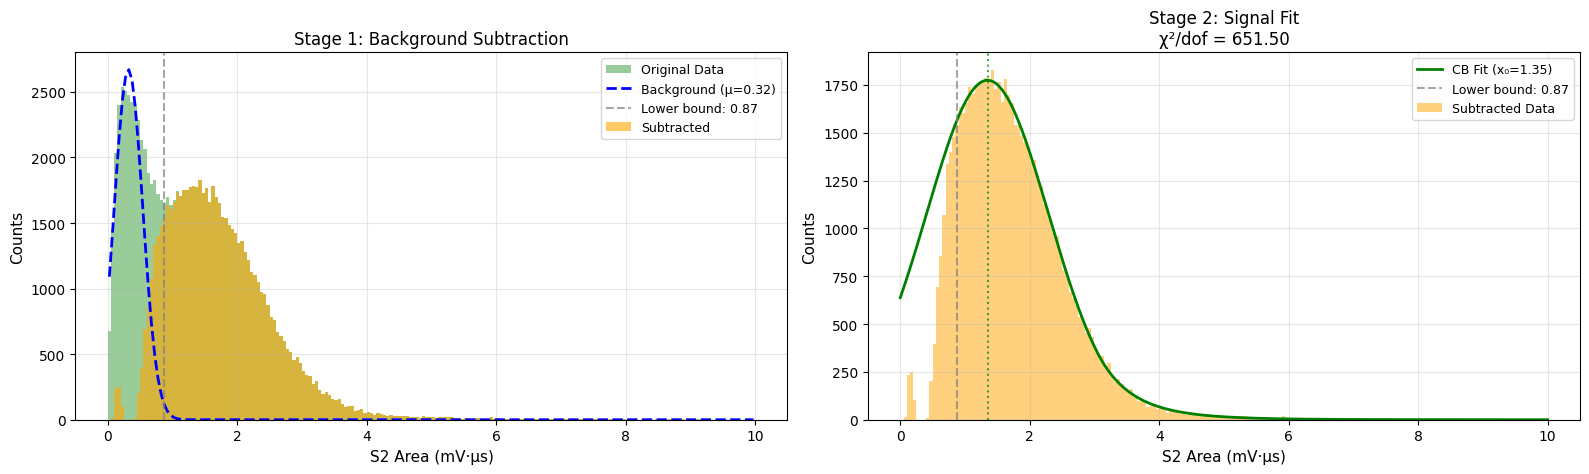

In [93]:
max_frames = [None, 40_000, 10_000, 5_000, 2_000, 1_000]
for maxf in max_frames:
    seti = workflow_s2_integration(setm, max_frames=maxf)
    s2a = load_s2area(s)
    fit_res = fit_s2_area_auto(s2a.areas, bin_cuts=(0,10), nbins=200, bg_threshold=0.4, bg_cutoff=0.5)
    plot_s2_fit_result(fit_res, s2a.areas)
    fits.append(fit_res)

In [95]:
max_frames = [2_000, 20_000]
for maxf in max_frames:
    seti = workflow_s2_integration(setm, max_frames=maxf)

  Integrating S2 window: [16.14, 24.93] µs
  Processing 42 files (~2016 frames)
    ✓ Integrated 2016 frames
    💾 Saved s2 areas to all/FieldScan_Gate0050_Anode1950_s2_areas.npz
  Integrating S2 window: [16.14, 24.93] µs
  Processing 417 files (~20016 frames)
    ✓ Integrated 20016 frames
    💾 Saved s2 areas to all/FieldScan_Gate0050_Anode1950_s2_areas.npz


In [36]:
path_stats = '/Volumes/KINGSTON/RaTag_data/RUN10_Ra226/processed_data/statistics_study'
files_stats = sorted(glob.glob(f'{path_stats}/*'))

In [38]:
from RaTag.core.datatypes import S2Areas

names = ['1k_frames', '2k_frames', '5k_frames', '10k_frames', '20k_frames', '40k_frames', '86k_frames']
areas_objects = {}
# path_areas = all_dir / f"{set_name}_s2_areas.npz"
for i,f in enumerate(files_stats):
    print(f'Loading areas from: {f}')
    f = Path(f)
    arr = np.load(f, allow_pickle=True)
        

    s2a = S2Areas(source_dir=setm.source_dir,
                areas=arr['s2_areas'],
                uids=arr['uids'],
                method="loaded_from_npz",
                params={"set_metadata": setm.metadata})
    areas_objects[names[i]] = s2a
    

Loading areas from: /Volumes/KINGSTON/RaTag_data/RUN10_Ra226/processed_data/statistics_study/FieldScan_Gate0050_Anode1950_s2_areas_01k.npz
Loading areas from: /Volumes/KINGSTON/RaTag_data/RUN10_Ra226/processed_data/statistics_study/FieldScan_Gate0050_Anode1950_s2_areas_02k.npz
Loading areas from: /Volumes/KINGSTON/RaTag_data/RUN10_Ra226/processed_data/statistics_study/FieldScan_Gate0050_Anode1950_s2_areas_05k.npz
Loading areas from: /Volumes/KINGSTON/RaTag_data/RUN10_Ra226/processed_data/statistics_study/FieldScan_Gate0050_Anode1950_s2_areas_10k.npz
Loading areas from: /Volumes/KINGSTON/RaTag_data/RUN10_Ra226/processed_data/statistics_study/FieldScan_Gate0050_Anode1950_s2_areas_20k.npz
Loading areas from: /Volumes/KINGSTON/RaTag_data/RUN10_Ra226/processed_data/statistics_study/FieldScan_Gate0050_Anode1950_s2_areas_40k.npz
Loading areas from: /Volumes/KINGSTON/RaTag_data/RUN10_Ra226/processed_data/statistics_study/FieldScan_Gate0050_Anode1950_s2_areas_86k.npz


In [76]:
areas_objects

{'1k_frames': S2Areas(source_dir=FieldScan_Gate0050_Anode1950, n_areas=1008, method=loaded_from_npz),
 '2k_frames': S2Areas(source_dir=FieldScan_Gate0050_Anode1950, n_areas=2016, method=loaded_from_npz),
 '5k_frames': S2Areas(source_dir=FieldScan_Gate0050_Anode1950, n_areas=5040, method=loaded_from_npz),
 '10k_frames': S2Areas(source_dir=FieldScan_Gate0050_Anode1950, n_areas=10032, method=loaded_from_npz),
 '20k_frames': S2Areas(source_dir=FieldScan_Gate0050_Anode1950, n_areas=20016, method=loaded_from_npz),
 '40k_frames': S2Areas(source_dir=FieldScan_Gate0050_Anode1950, n_areas=40032, method=loaded_from_npz),
 '86k_frames': S2Areas(source_dir=FieldScan_Gate0050_Anode1950, n_areas=86400, method=loaded_from_npz)}

  Background detection: 46.0% of counts in low region
  Recommendation: two_stage
  Using two-stage fitting with background subtraction...


/Users/pabloherrero/sabat/RaTagging/RaTag/core/fitting.py:297: RuntimeWarning: invalid value encountered in power
  tail = A_tail / (B + z)**m


  Background detection: 43.8% of counts in low region
  Recommendation: two_stage
  Using two-stage fitting with background subtraction...
  Background detection: 42.4% of counts in low region
  Recommendation: two_stage
  Using two-stage fitting with background subtraction...
  Background detection: 42.9% of counts in low region
  Recommendation: two_stage
  Using two-stage fitting with background subtraction...
  Background detection: 42.6% of counts in low region
  Recommendation: two_stage
  Using two-stage fitting with background subtraction...
  Background detection: 42.6% of counts in low region
  Recommendation: two_stage
  Using two-stage fitting with background subtraction...
  Background detection: 42.7% of counts in low region
  Recommendation: two_stage
  Using two-stage fitting with background subtraction...


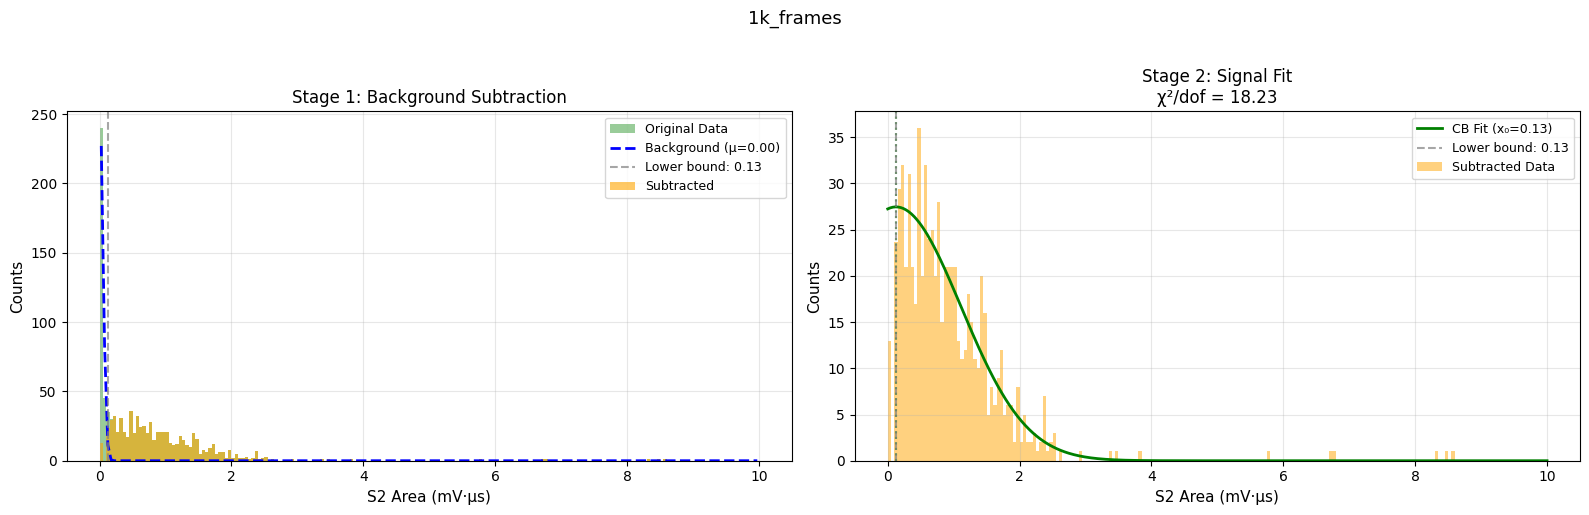

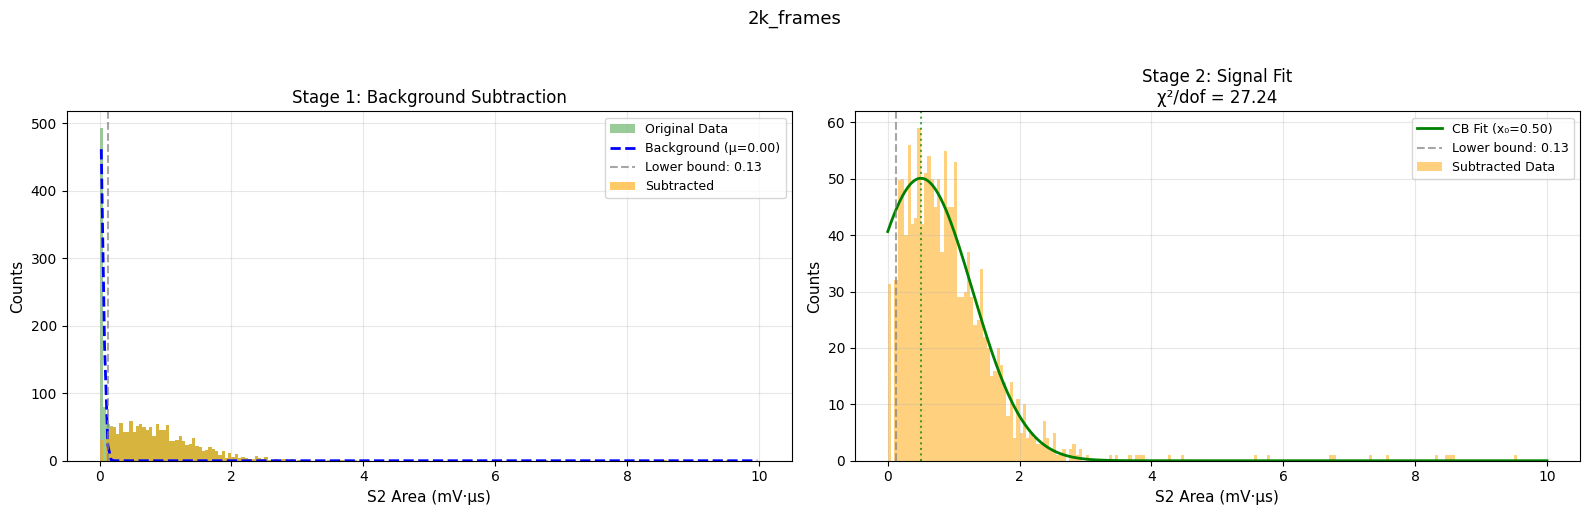

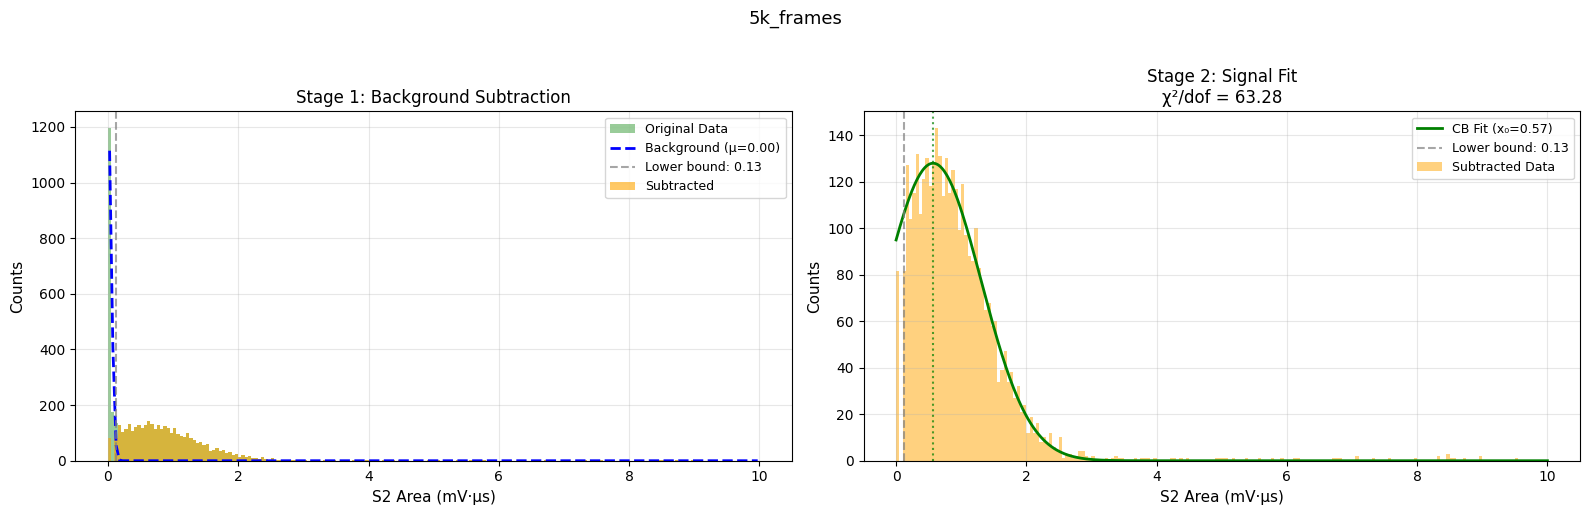

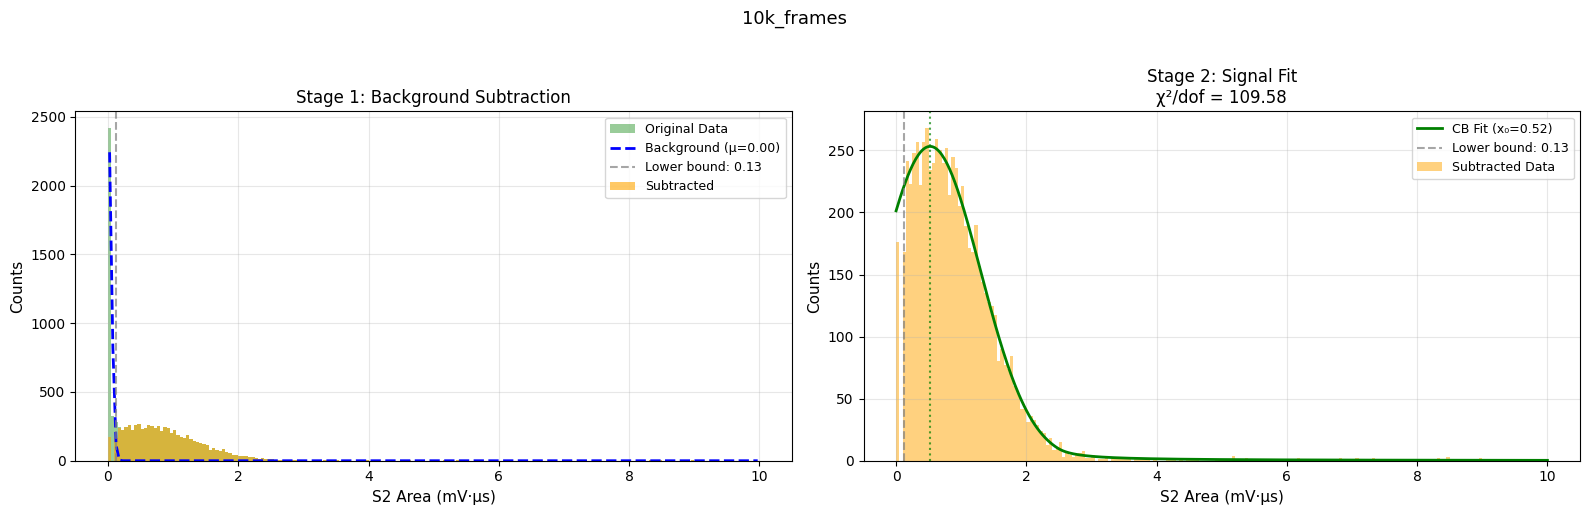

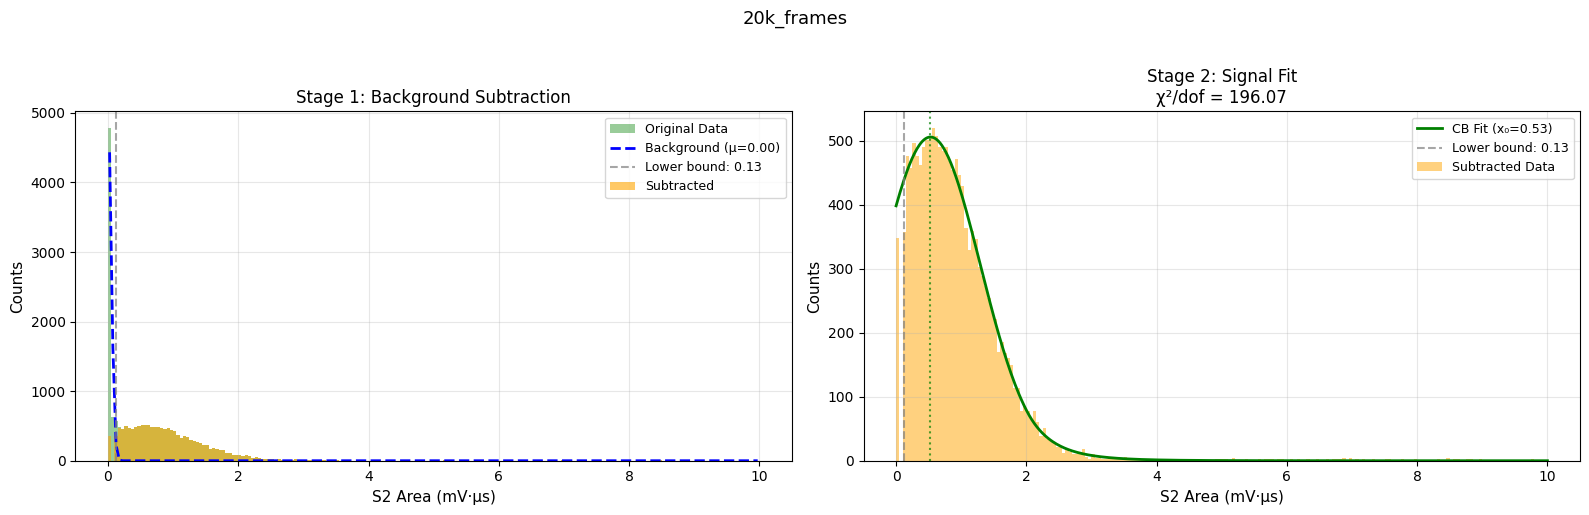

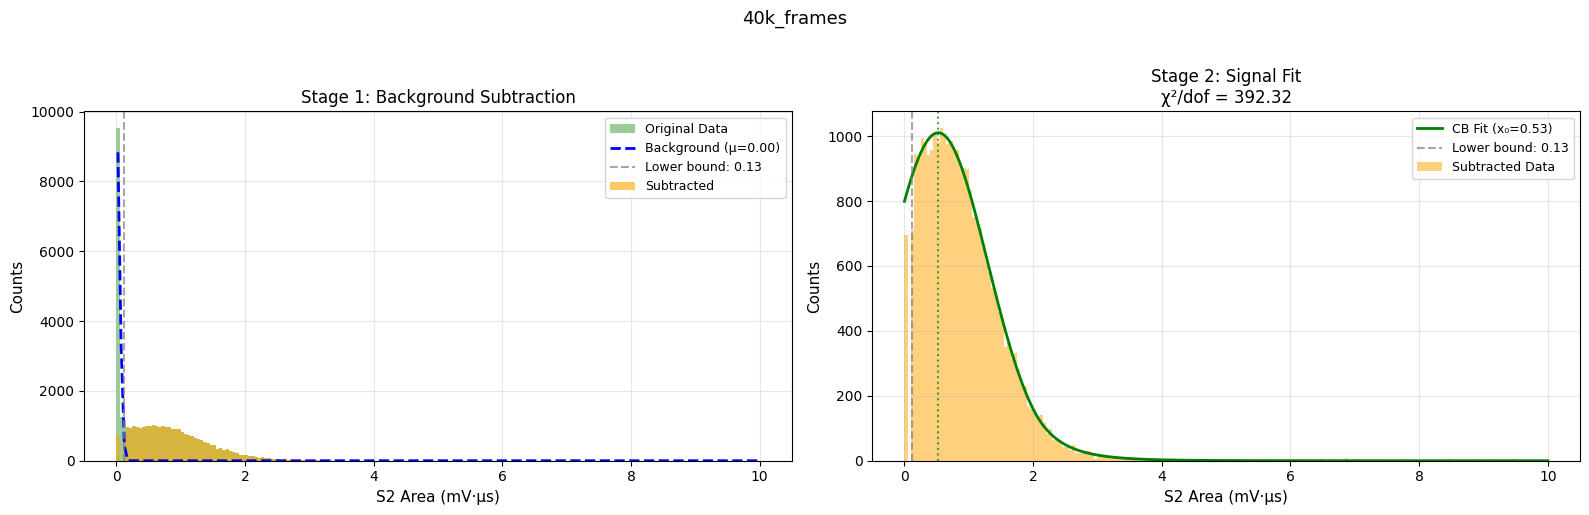

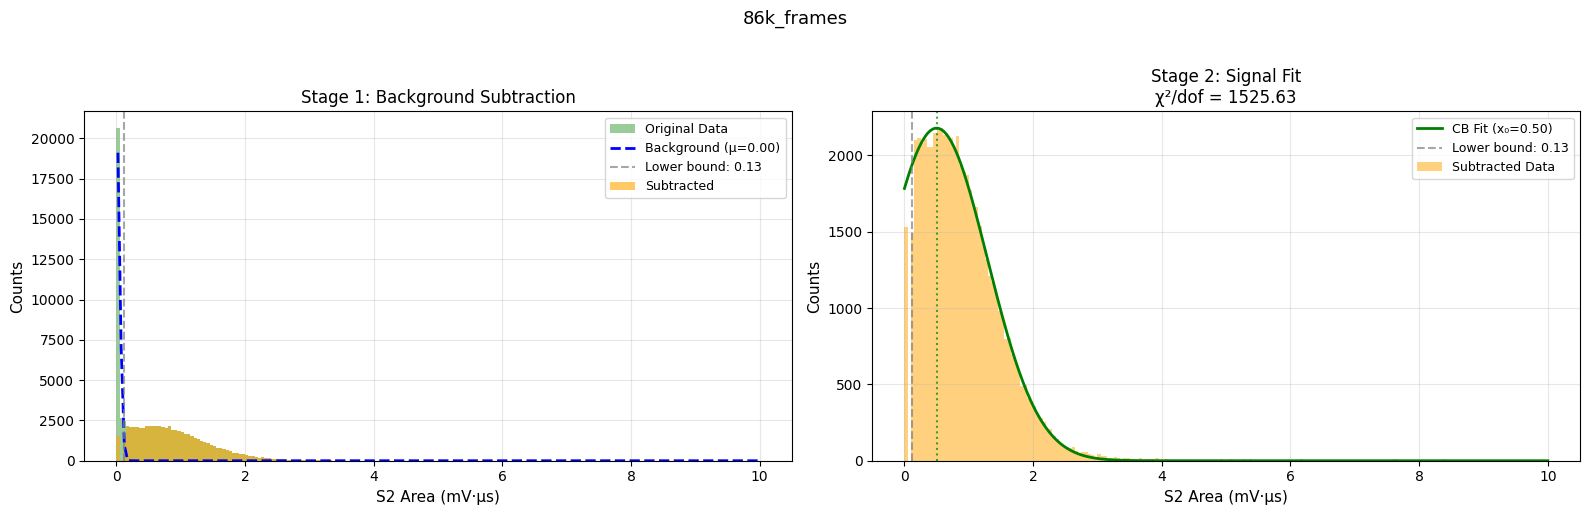

In [68]:
nframes = [1000, 2000, 5000, 10_000, 20_000, 40_000, 86_000]
fits = []
chi2s = []
sigmas = []
for k, s2a in areas_objects.items():
    fit_res = fit_s2_area_auto(s2a.areas, bin_cuts=(0,10), nbins=200, bg_threshold=0.4, bg_cutoff=0.5)
    plot_s2_fit_result(fit_res, s2a.areas, set_name=k)
    fits.append(fit_res['result_sig'])
    chi2s.append(fit_res['chi2'])
    sigmas.append(fit_res['peak_stderr']if fit_res['peak_stderr'] is not None else 0) 

In [48]:
fits[-1].params['sig_sigma'].value

np.float64(0.7905121118947664)

In [111]:
fits[-1].params['sig_x0']

<Parameter 'sig_x0', value=np.float64(0.5001296836705657), bounds=[np.float64(0.12500000001459732):3.5]>

In [112]:
fits[4].params['sig_x0']

<Parameter 'sig_x0', value=np.float64(0.5281273528616286) +/- 0.0161, bounds=[np.float64(0.1250000000107384):3.5]>

### Inconsistent uncertainties (stderr fails for high and low statistics)

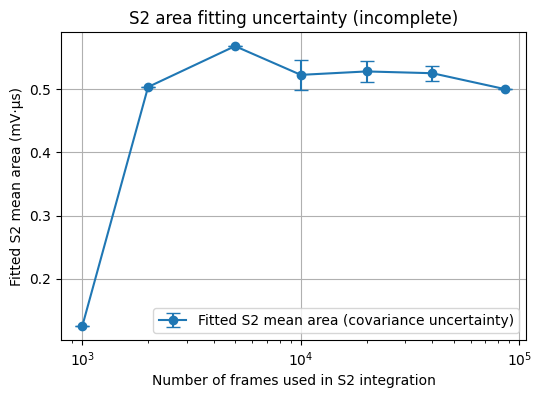

In [128]:
x0s = []
# sigmas = []
for i in range(len(fits)):
    x0s.append(fits[i].params['sig_x0'].value)
    # sigmas.append(fits[i].params['peak_stderr'].value if fits[i].params['peak_stderr'] is not None else 0 )

fig = plt.figure(figsize=(6, 4))
plt.errorbar(nframes, x0s, yerr=sigmas, fmt='o-', capsize=5, label='Fitted S2 mean area (covariance uncertainty)')
plt.gca().set(xlabel='Number of frames used in S2 integration', ylabel='Fitted S2 mean area (mV·µs)', xscale='log', title='S2 area fitting uncertainty (incomplete)')
plt.legend()
plt.grid()
plt.gcf().savefig('/Users/pabloherrero/sabat/RaTagging/figures_paper/s2_area_nframes_mean.png', dpi=300)

In [134]:
fit_res['result_sig'].bic

np.float64(455.06099579312536)

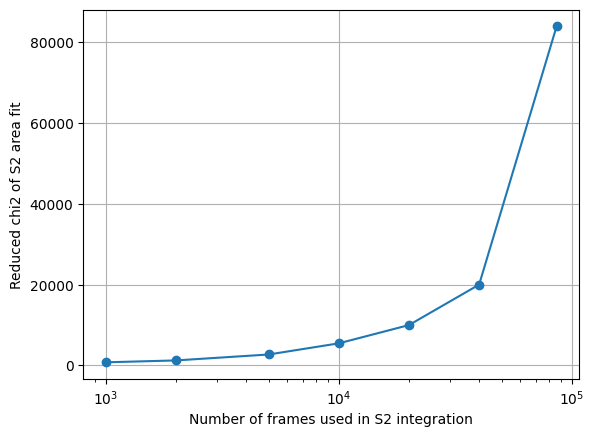

In [57]:
plt.plot(nframes, chi2s, 'o-')
plt.gca().set(xlabel='Number of frames used in S2 integration', ylabel='Reduced chi2 of S2 area fit', xscale='log')
plt.grid()

[Text(0.5, 0, 'Number of frames used in S2 integration'),
 Text(0, 0.5, 'Akaike Information Criterion'),
 None]

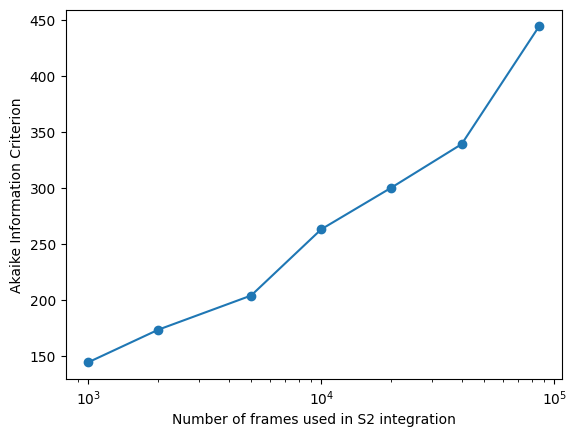

In [138]:
aics = []
bics = []
for i in range(len(fits)):
    aics.append(fits[i].aic)
    bics.append(fits[i].bic)
plt.plot(nframes, aics, 'o-')
plt.gca().set(xlabel='Number of frames used in S2 integration', ylabel='Akaike Information Criterion', xscale='log')

### Consistent Hessian-only uncertainty extraction

You're absolutely correct - mixing different uncertainty methods makes no sense for comparison! Let's use the Hessian method for ALL fits to get a consistent, comparable uncertainty estimate.

In [114]:
def hessian_uncertainty_only(fit_result, param_name='sig_x0'):
    """
    Extract parameter uncertainty using ONLY the Hessian method for all fits.
    This ensures consistent, comparable uncertainty estimates across all statistics.
    """
    param = fit_result.params[param_name]
    
    try:
        def chi2_func(x):
            params_copy = fit_result.params.copy()
            params_copy[param_name].set(value=x)
            model_eval = fit_result.model.eval(params=params_copy, x=fit_result.userkws['x'])
            residual = fit_result.data - model_eval
            return np.sum(residual**2)
        
        x0 = param.value
        h = max(abs(x0) * 1e-6, 1e-8)  # Adaptive step size
        
        # Second derivative using finite differences
        f0 = chi2_func(x0)
        fp = chi2_func(x0 + h)
        fm = chi2_func(x0 - h)
        second_deriv = (fp - 2*f0 + fm) / h**2
        
        if second_deriv > 1e-10:  # Check for positive curvature
            # For χ² minimization: uncertainty ≈ sqrt(2/curvature)
            uncertainty = np.sqrt(2.0 / second_deriv)
            # Sanity check: uncertainty should be reasonable
            if 0 < uncertainty < abs(param.value) * 10:
                return uncertainty
    except Exception as e:
        print(f"Hessian calculation failed for {param_name}: {e}")
    
    # If Hessian fails, return NaN for clear identification
    return np.nan


In [115]:

# Calculate Hessian uncertainties for ALL fits
print("Hessian-only uncertainty extraction:")
print("="*50)

sigmas_hessian = []
original_stderrs = []

for i, fit in enumerate(fits):
    nframe = nframes[i]
    uncertainty = hessian_uncertainty_only(fit, 'sig_x0')
    sigmas_hessian.append(uncertainty)
    
    # Compare with original lmfit stderr
    original_stderr = fit.params['sig_x0'].stderr
    if original_stderr is not None:
        original_stderrs.append(original_stderr)
    print(f"Frame {nframe:,}: Hessian=±{uncertainty:.6f}, lmfit=±{original_stderr if original_stderr else 'None'}")

print(f"\nHessian sigmas: {sigmas_hessian}")
print(f"Original sigmas: {sigmas}")

# Check if any Hessian calculations failed
failed_hessian = sum(1 for s in sigmas_hessian if np.isnan(s))
print(f"Failed Hessian calculations: {failed_hessian} out of {len(sigmas_hessian)}")
factor_unc = np.average(original_stderrs) / np.average(sigmas_hessian)
print(f"Average factor between original stderr and Hessian: {factor_unc:.2f}")
sigmas_hessian_scaled = [s * factor_unc if not np.isnan(s) else np.nan for s in sigmas_hessian]

Hessian-only uncertainty extraction:
Frame 1,000: Hessian=±0.000101, lmfit=±None
Frame 2,000: Hessian=±0.005744, lmfit=±None
Frame 5,000: Hessian=±0.002137, lmfit=±None
Frame 10,000: Hessian=±0.001126, lmfit=±0.02394480250491136
Frame 20,000: Hessian=±0.000561, lmfit=±0.016139655290436674
Frame 40,000: Hessian=±0.000282, lmfit=±0.011593719293850417
Frame 86,000: Hessian=±0.000133, lmfit=±None

Hessian sigmas: [np.float64(0.00010050864610868608), np.float64(0.005744139106075211), np.float64(0.0021370406081541874), np.float64(0.0011261161335021012), np.float64(0.0005614273123371649), np.float64(0.0002821013531982794), np.float64(0.00013330651910870736)]
Original sigmas: [0, 0, 0, np.float64(0.02394480250491136), np.float64(0.016139655290436674), np.float64(0.011593719293850417), 0]
Failed Hessian calculations: 0 out of 7
Average factor between original stderr and Hessian: 11.96


/Users/pabloherrero/sabat/RaTagging/RaTag/core/fitting.py:297: RuntimeWarning: invalid value encountered in power
  tail = A_tail / (B + z)**m



 Uncertainty scaling analysis:
 1,000 frames: σ=0.000101
 2,000 frames: σ=0.005744
 5,000 frames: σ=0.002137
10,000 frames: σ=0.001126
20,000 frames: σ=0.000561
40,000 frames: σ=0.000282
86,000 frames: σ=0.000133


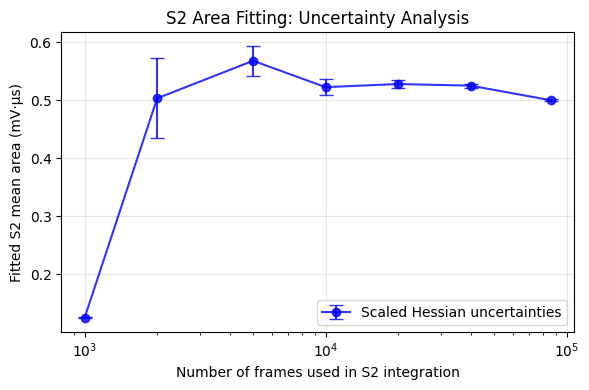

In [123]:
# Create a clean comparison plot using consistent Hessian uncertainties
x0s = []
for i in range(len(fits)):
    x0s.append(fits[i].params['sig_x0'].value)

fig, (ax1) = plt.subplots(1, 1, figsize=(6, 4))

# Plot 1: Parameter values with consistent Hessian uncertainties
ax1.errorbar(nframes, x0s, yerr=sigmas_hessian_scaled, fmt='o-', capsize=5, 
            label='Scaled Hessian uncertainties', color='blue', alpha=0.8)
# Also show lmfit for comparison (only where available)
lmfit_sigmas_clean = [s if s > 0 else np.nan for s in sigmas]
# ax1.errorbar(nframes, x0s, yerr=lmfit_sigmas_clean, fmt='s--', capsize=3, 
#             label='lmfit stderr (where available)', color='blue', alpha=0.6)
ax1.set(xlabel='Number of frames used in S2 integration', 
        ylabel='Fitted S2 mean area (mV·µs)', 
        xscale='log',
        title='S2 Area Fitting: Uncertainty Analysis')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='lower right')


plt.tight_layout()

# Analysis of uncertainty scaling
print("\n Uncertainty scaling analysis:")

for i in range(len(nframes)):
    ratio_to_first = sigmas_hessian[0] / sigmas_hessian[i] if sigmas_hessian[i] > 0 else np.inf
    sqrt_ratio = np.sqrt(nframes[i] / nframes[0])
    print(f"{nframes[i]:6,} frames: σ={sigmas_hessian[i]:.6f}")
plt.gcf().savefig('/Users/pabloherrero/sabat/RaTagging/figures_paper/s2_area_nframes_analysis.png', dpi=300)

In [121]:
x = 400 * 25 / 2000
x

5.0